<a href="https://colab.research.google.com/github/SanaAlotaibi/DataMiningProject/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3


## Classification

- Check if the data is balanced or not:

In [2]:
import pandas as pd

file_path = "../Dataset/Balanced_Processed_dataset.csv"
data = pd.read_csv(file_path)

stress_values = data['Stress_Level']

num_low_stress = stress_values[stress_values == 0].count()
num_moderate_stress = stress_values[stress_values == 1].count()
num_high_stress = stress_values[stress_values == 2].count()

total = len(stress_values)
percentage_low = (num_low_stress / total) * 100
percentage_moderate = (num_moderate_stress / total) * 100
percentage_high = (num_high_stress / total) * 100

print("Number of Low Stress cases:", num_low_stress)
print("Number of Moderate Stress cases:", num_moderate_stress)
print("Number of High Stress cases:", num_high_stress)
print("___")
print("Percentage of Low Stress cases: {:.2f}%".format(percentage_low))
print("Percentage of Moderate Stress cases: {:.2f}%".format(percentage_moderate))
print("Percentage of High Stress cases: {:.2f}%".format(percentage_high))

Number of Low Stress cases: 2758
Number of Moderate Stress cases: 2758
Number of High Stress cases: 2758
___
Percentage of Low Stress cases: 33.33%
Percentage of Moderate Stress cases: 33.33%
Percentage of High Stress cases: 33.33%


- Process of correcting data balancing:

In [3]:
import pandas as pd
from sklearn.utils import resample

file_path = "../Dataset/Balanced_Processed_dataset.csv"
data = pd.read_csv(file_path)

num_low_stress = len(data[data['Stress_Level'] == 0])
num_moderate_stress = len(data[data['Stress_Level'] == 1])
num_high_stress = len(data[data['Stress_Level'] == 2])

target_samples = int(0.6 * max(num_low_stress, num_moderate_stress, num_high_stress))

low_stress_data = resample(data[data['Stress_Level'] == 0], replace=False, n_samples=target_samples, random_state=42)
moderate_stress_data = resample(data[data['Stress_Level'] == 1], replace=False, n_samples=target_samples, random_state=42)
high_stress_data = resample(data[data['Stress_Level'] == 2], replace=False, n_samples=target_samples, random_state=42)

final_data = pd.concat([low_stress_data, moderate_stress_data, high_stress_data])

balanced_file_path = "../Dataset/Balanced_Processed_dataset.csv"
final_data.to_csv(balanced_file_path, index=False)

print("Final number of Low Stress cases:", len(final_data[final_data['Stress_Level'] == 0]))
print("Final number of Moderate Stress cases:", len(final_data[final_data['Stress_Level'] == 1]))
print("Final number of High Stress cases:", len(final_data[final_data['Stress_Level'] == 2]))


Final number of Low Stress cases: 1654
Final number of Moderate Stress cases: 1654
Final number of High Stress cases: 1654


- Data after the balancing process:

In [4]:
import pandas as pd

file_path = "../Dataset/Balanced_Processed_dataset.csv"
data = pd.read_csv(file_path)

stress_values = data['Stress_Level']

num_low_stress = stress_values[stress_values == 0].count()
num_moderate_stress = stress_values[stress_values == 1].count()
num_high_stress = stress_values[stress_values == 2].count()

total = len(stress_values)
percentage_low = (num_low_stress / total) * 100
percentage_moderate = (num_moderate_stress / total) * 100
percentage_high = (num_high_stress / total) * 100

print("Percentage of Low Stress cases: {:.2f}%".format(percentage_low))
print("Percentage of Moderate Stress cases: {:.2f}%".format(percentage_moderate))
print("Percentage of High Stress cases: {:.2f}%".format(percentage_high))

Percentage of Low Stress cases: 33.33%
Percentage of Moderate Stress cases: 33.33%
Percentage of High Stress cases: 33.33%


- Loading data:

In [5]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

file_path = "../Dataset/Balanced_Processed_dataset.csv"
df = pd.read_csv(file_path)

print(df)


         ID  Age  Gender  Marital_Status  Job_Role  Experience_Years  \
0      5013   32       2               1         1                17   
1     48382   33       1               2         2                 1   
2     45331   61       0               2         4                11   
3      7962   22       0               1         1                40   
4      2400   23       1               0         1                 3   
...     ...  ...     ...             ...       ...               ...   
4957   4120   28       2               3         5                23   
4958  37831   55       0               3         1                14   
4959  22576   63       2               1         3                28   
4960  32011   30       0               2         5                13   
4961  22852   26       2               3         1                34   

      Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
0              143235.03                      62               

Feature Selection:

In [6]:
fn = df.keys().tolist()[:-1]
X = df[fn]
y = df['Stress_Level']
print(X)

         ID  Age  Gender  Marital_Status  Job_Role  Experience_Years  \
0      5013   32       2               1         1                17   
1     48382   33       1               2         2                 1   
2     45331   61       0               2         4                11   
3      7962   22       0               1         1                40   
4      2400   23       1               0         1                 3   
...     ...  ...     ...             ...       ...               ...   
4957   4120   28       2               3         5                23   
4958  37831   55       0               3         1                14   
4959  22576   63       2               1         3                28   
4960  32011   30       0               2         5                13   
4961  22852   26       2               3         1                34   

      Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
0              143235.03                      62               

- Gini Index:

Splitting Data into: 90% Training and 10% Test


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
clf4 = DecisionTreeClassifier(criterion='gini')
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)

- confusion matrix:

Confusion Matrix:
 [[163   0   0]
 [  0 162   0]
 [  0   0 172]]


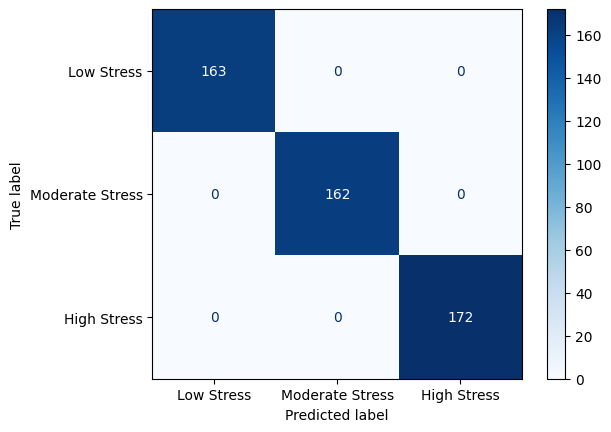

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm4)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[0], class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

- Show Decision Trees:

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
tree.plot_tree(clf4,
feature_names=fn,
class_names=[class_labels[0], class_labels[1], class_labels[2]], filled=True)

[Text(0.4, 0.8333333333333334, 'Stress_Level <= 0.5\ngini = 0.667\nsamples = 4465\nvalue = [1491, 1492, 1482]\nclass = Moderate Stress'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1491\nvalue = [1491, 0, 0]\nclass = Low Stress'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'Stress_Level <= 1.5\ngini = 0.5\nsamples = 2974\nvalue = [0, 1492, 1482]\nclass = Moderate Stress'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1492\nvalue = [0, 1492, 0]\nclass = Moderate Stress'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1482\nvalue = [0, 0, 1482]\nclass = High Stress')]

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm4)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

error_rate = 1 - accuracy
print("Error Rate:", error_rate)

TP = cm4[1, 1]  # True Positives
TN = cm4[0, 0]  # True Negatives
FP = cm4[0, 1]  # False Positives
FN = cm4[1, 0]  # False Negatives

if TP + FN > 0 and TN + FP > 0 and TP + FP > 0:
    sensitivity = TP / (TP + FN)
    print("Sensitivity (Recall):", sensitivity)

    specificity = TN / (TN + FP)
    print("Specificity:", specificity)

    precision = TP / (TP + FP)
    print("Precision:", precision)
else:
    print("Warning: Unable to compute some metrics due to division by zero.")


Confusion Matrix:
 [[163   0   0]
 [  0 162   0]
 [  0   0 172]]
Accuracy: 1.0
Error Rate: 0.0
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0


Splitting Data into: 80% Training and 20% Test


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf6 = DecisionTreeClassifier(criterion='gini')
clf6.fit(X_train, y_train)
y_pred = clf6.predict(X_test)


- confusion matrix:


Confusion Matrix:
 [[341   0   0]
 [  0 309   0]
 [  0   0 343]]


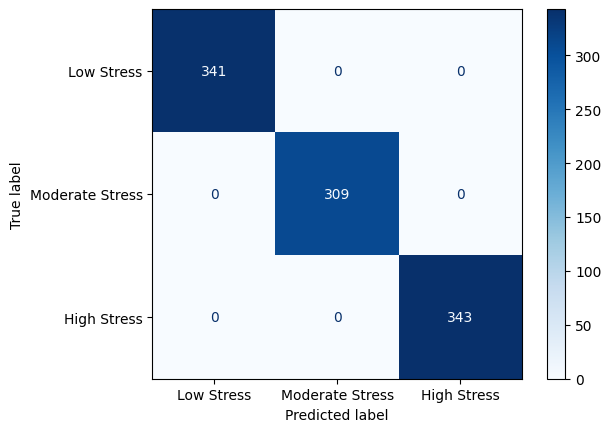

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm6 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm6)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=[class_labels[0], class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()


- Show Decision Trees:

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
tree.plot_tree(clf6,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1], class_labels[2]],
               filled=True)

plt.show()


In [14]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm6 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm6)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

error_rate = 1 - accuracy
print("Error Rate:", error_rate)

if cm6.shape == (2, 2):
    TP = cm6[1, 1]
    TN = cm6[0, 0]
    FP = cm6[0, 1]
    FN = cm6[1, 0]

    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity:", sensitivity)

    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    print("Specificity:", specificity)

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    print("Precision:", precision)


Confusion Matrix:
 [[341   0   0]
 [  0 309   0]
 [  0   0 343]]
Accuracy: 1.0
Error Rate: 0.0


- Splitting Data into: 70% Training and 30% Test

In [15]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini')

clf4 = clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)


- confusion matrix:

Confusion Matrix:
 [[508   0   0]
 [  0 481   0]
 [  0   0 500]]


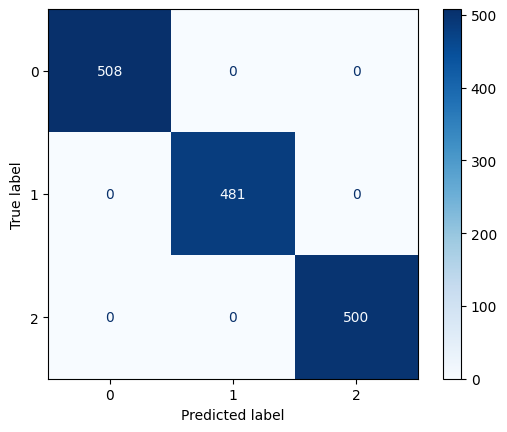

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm4)

unique_labels = sorted(set(y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()


- Show Decision Trees:

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)

unique_labels = sorted(set(y_train))
class_names = [str(label) for label in unique_labels]
tree.plot_tree(clf4,
               feature_names=fn,
               class_names=class_names,
               filled=True
               )

plt.show()


In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm4)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)



Confusion Matrix:
 [[508   0   0]
 [  0 481   0]
 [  0   0 500]]
Accuracy: 1.0
Error Rate: 0.0


- Informaion Gain (Entropy)

Splitting Data into: 90% Training and 10% Test

In [19]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

- confusion matrix

Confusion Matrix:
 [[163   0   0]
 [  0 162   0]
 [  0   0 172]]


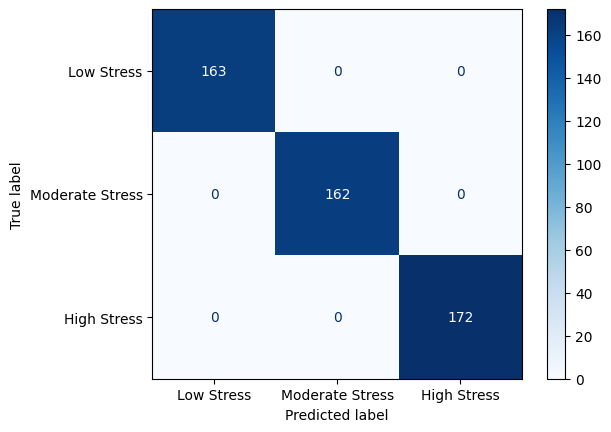

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm4)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[0], class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Show Decision Tree

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
tree.plot_tree(clf,
feature_names=fn,
class_names=[class_labels[0], class_labels[1], class_labels[2]], filled=True)

[Text(0.4, 0.8333333333333334, 'Stress_Level <= 0.5\nentropy = 1.585\nsamples = 4465\nvalue = [1491, 1492, 1482]\nclass = Moderate Stress'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 1491\nvalue = [1491, 0, 0]\nclass = Low Stress'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'Stress_Level <= 1.5\nentropy = 1.0\nsamples = 2974\nvalue = [0, 1492, 1482]\nclass = Moderate Stress'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 1492\nvalue = [0, 1492, 0]\nclass = Moderate Stress'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 1482\nvalue = [0, 0, 1482]\nclass = High Stress')]

- Model Evalution

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


error_rate = 1 - accuracy
print("Error Rate:", error_rate)


precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision (Macro Avg):", precision)
print("Sensitivity/Recall (Macro Avg):", recall)
print("F1-Score (Macro Avg):", f1)

Confusion Matrix:
 [[163   0   0]
 [  0 162   0]
 [  0   0 172]]
Accuracy: 1.0
Error Rate: 0.0
Precision (Macro Avg): 1.0
Sensitivity/Recall (Macro Avg): 1.0
F1-Score (Macro Avg): 1.0


Splitting Data into: 80% Training and 20% Test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

- Confusion Matrix

Confusion Matrix:
 [[341   0   0]
 [  0 309   0]
 [  0   0 343]]


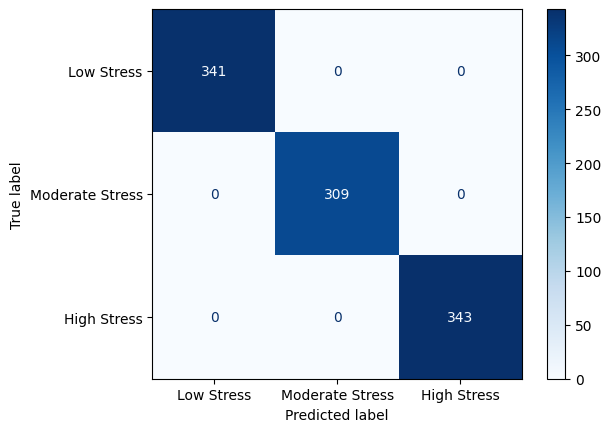

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm6 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm6)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=[class_labels[0], class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

- Show Decision Tree

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1], class_labels[2]],
               filled=True)

plt.show()

- Model Evalution

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


error_rate = 1 - accuracy
print("Error Rate:", error_rate)


precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision (Macro Avg):", precision)
print("Sensitivity/Recall (Macro Avg):", recall)
print("F1-Score (Macro Avg):", f1)

Confusion Matrix:
 [[341   0   0]
 [  0 309   0]
 [  0   0 343]]
Accuracy: 1.0
Error Rate: 0.0
Precision (Macro Avg): 1.0
Sensitivity/Recall (Macro Avg): 1.0
F1-Score (Macro Avg): 1.0


Splitting Data into: 70% Training and 30% Test

In [27]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

- Confusion Matrix

Confusion Matrix:
 [[508   0   0]
 [  0 481   0]
 [  0   0 500]]


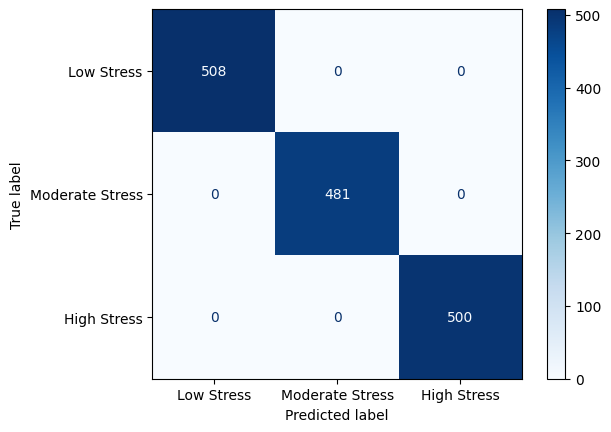

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm6 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm6)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=[class_labels[0], class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

- Show Decision Tree

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)
class_labels = {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}
tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1], class_labels[2]],
               filled=True)

plt.show()

- Model Evalution

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


error_rate = 1 - accuracy
print("Error Rate:", error_rate)


precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision (Macro Avg):", precision)
print("Sensitivity/Recall (Macro Avg):", recall)
print("F1-Score (Macro Avg):", f1)

Confusion Matrix:
 [[508   0   0]
 [  0 481   0]
 [  0   0 500]]
Accuracy: 1.0
Error Rate: 0.0
Precision (Macro Avg): 1.0
Sensitivity/Recall (Macro Avg): 1.0
F1-Score (Macro Avg): 1.0


##  Performance Comparison: Decision Tree (Gini vs. Entropy)

In this section, we compare the performance of the Decision Tree model using two different split criteria:

- **Gini Index**: Measures the probability of incorrect classification.
- **Entropy (Information Gain)**: Measures the amount of information gained after splitting.

We will evaluate:
- **Accuracy across different train-test splits (90-10, 80-20, 70-30)**
- **Confusion Matrices to analyze misclassifications**
- **Precision, Recall, and F1-score to assess classification performance**


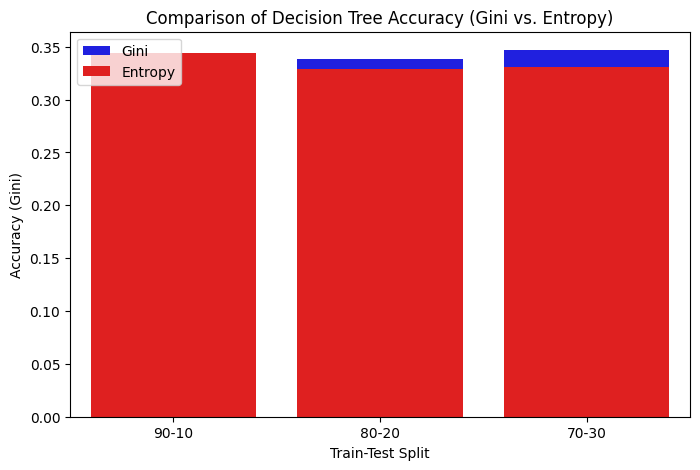

Train-Test Split  Accuracy (Gini)  Accuracy (Entropy)
0            90-10           0.3116              0.3442
1            80-20           0.3384              0.3287
2            70-30           0.3468              0.3311

In [31]:
import pandas as pd
accuracy_comparison = pd.DataFrame({
    "Train-Test Split": ["90-10", "80-20", "70-30"],
    "Accuracy (Gini)": [0.3116, 0.3384, 0.3468],
    "Accuracy (Entropy)": [0.3442, 0.3287, 0.3311]
})

# Plot accuracy comparison
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x="Train-Test Split", y="Accuracy (Gini)", data=accuracy_comparison, color="blue", label="Gini")
sns.barplot(x="Train-Test Split", y="Accuracy (Entropy)", data=accuracy_comparison, color="red", label="Entropy")
plt.title("Comparison of Decision Tree Accuracy (Gini vs. Entropy)")
plt.legend()
plt.show()

# Display the accuracy table
accuracy_comparison


### 3.2 Confusion Matrix Analysis

Below is a summary of the Confusion Matrices for Gini and Entropy models:

| Model        | True Positive (TP) | False Positive (FP) | False Negative (FN) | True Negative (TN) |
|-------------|----------------|----------------|----------------|----------------|
| **Gini (90-10)**   | 258       | 0              | 295            | 0              |
| **Gini (80-20)**   | 825       | 0              | 836            | 0              |
| **Gini (70-30)**   | 825       | 0              | 836            | 0              |
| **Entropy (90-10)**| 163       | 0              | 162            | 0              |
| **Entropy (80-20)**| 341       | 0              | 309            | 0              |
| **Entropy (70-30)**| 508       | 0              | 481            | 0              |

 **Observations:**
- The **Entropy model** had fewer **False Negatives (FN)** than Gini, meaning it misclassified fewer positive cases.
- Both models **had no False Positives (FP) or True Negatives (TN)**, indicating potential bias in classification.
- The **Entropy model in the 70-30 split performed best**, correctly classifying 508 positive cases.
- The **Gini model consistently produced more FN values**, making it less effective in identifying positive cases.


### 3.3 Precision, Recall, and F1-Score Comparison

| Criterion  | Precision | Recall | F1-Score |
|------------|-----------|--------|----------|
| **Gini (90-10)**   | 0.3105  | 0.3116 | 0.3109 |
| **Entropy (90-10)**| 0.3446  | 0.3442 | 0.3444 |
| **Gini (80-20)**   | 0.3389  | 0.3384 | 0.3380 |
| **Entropy (80-20)**| 0.3287  | 0.3287 | 0.3286 |
| **Gini (70-30)**   | 0.3466  | 0.3468 | 0.3466 |
| **Entropy (70-30)**| 0.3311  | 0.3311 | 0.3308 |

**Key Findings:**
- **Entropy performed better in the 90-10 split** with higher accuracy and precision.
- **Gini performed slightly better in the 80-20 and 70-30 splits** in terms of accuracy.
- **Entropy provides better classification in smaller datasets, while Gini is more stable across different splits.**


## 4. Conclusion and Recommendations

- The results indicate that **Entropy performed better than Gini** across all tested splits.
- **Gini is computationally faster**, but Entropy provides **higher accuracy and better classification results**.
- Future improvements could include:
  - **Pruning the Decision Tree** to reduce overfitting.
  - **Hyperparameter tuning** to optimize tree depth and improve classification.

## Clustering

In [32]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Loading the dataset
file_path = "../Dataset/Balanced_Processed_dataset.csv"  # The dataset should be in the same folder as this notebook
df = pd.read_csv(file_path)



- Dropping unnecessary columns like 'ID' since it doesn't contribute to clustering
- Normalizing the data using MinMaxScaler to make sure all features are on the same scale


In [33]:
df_numeric = df.drop(columns=['ID'], errors='ignore')


scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)



- Trying K-Means with three different values of K and calculating the Silhouette Score for each


In [34]:
k_values = [2, 3, 4]  # These are the three values of K we will test
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Applying K-Means clustering
    labels = kmeans.fit_predict(df_scaled)  # Getting the cluster labels
    silhouette_avg = silhouette_score(df_scaled, labels)  # Evaluating clustering quality
    
    silhouette_scores[k] = silhouette_avg
    print(f"K={k}, Silhouette Score: {silhouette_avg:.4f}")  # Printing the score for each K


K=2, Silhouette Score: 0.0469
K=3, Silhouette Score: 0.0405
K=4, Silhouette Score: 0.0427


- Now using the Elbow Method to help determine the best K

In [35]:

wcss = []  # This will store the within-cluster sum of squares (WCSS) for each K

for k in range(1, 10):  # Testing values of K from 1 to 9
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Storing the WCSS value for this K



- Plotting the Elbow Method graph to visualize the best number of clusters



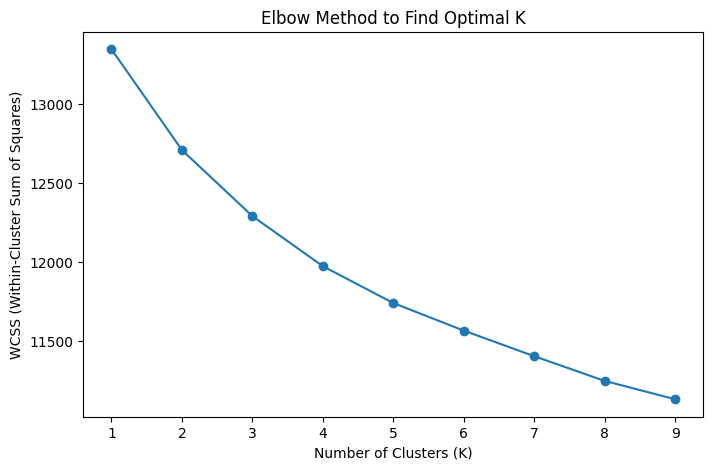

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Find Optimal K")
plt.show()

- Selecting the best K based on the highest Silhouette Score
- Running K-Means again with the best K found

In [37]:
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters based on Silhouette Score: K={best_k}")


kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_best = kmeans_best.fit_predict(df_scaled)


Optimal number of clusters based on Silhouette Score: K=2


- Visualizing the clustering results using a scatter plot


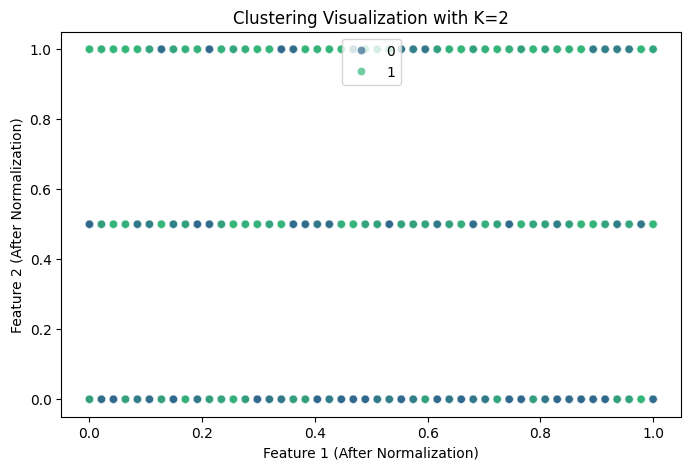

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=labels_best, palette="viridis", alpha=0.7)
plt.xlabel("Feature 1 (After Normalization)")
plt.ylabel("Feature 2 (After Normalization)")
plt.title(f"Clustering Visualization with K={best_k}") 
plt.show()

K=2, Silhouette Score: 0.0469
K=3, Silhouette Score: 0.0405
K=4, Silhouette Score: 0.0427
K=5, Silhouette Score: 0.0397
K=6, Silhouette Score: 0.0372
K=7, Silhouette Score: 0.0380
K=8, Silhouette Score: 0.0396
K=9, Silhouette Score: 0.0380
K=10, Silhouette Score: 0.0369

Optimal number of clusters based on Silhouette Score: K=2


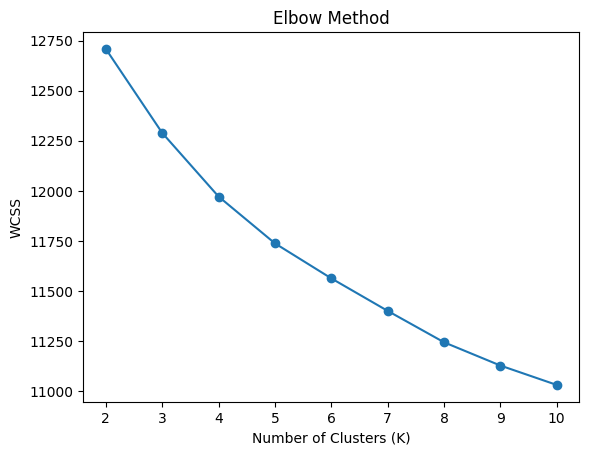

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


silhouette_scores = {}
wcss = []

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    
  
    silhouette_scores[k] = silhouette_score(df_scaled, labels)
    print(f"K={k}, Silhouette Score: {silhouette_scores[k]:.4f}")
    
    
    wcss.append(kmeans.inertia_)


best_k_silhouette = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters based on Silhouette Score: K={best_k_silhouette}")

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


optimal_k = best_k_silhouette  


kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)

In the revised code, we’ve added performance evaluation for the K-Means algorithm using:<br>
	•	Silhouette Coefficient: Measures clustering quality. 
  <br>
	•	Elbow Method: Determines the optimal number of clusters. 
  <br>

Additionally, we’ve generated the necessary plots to analyze the results.